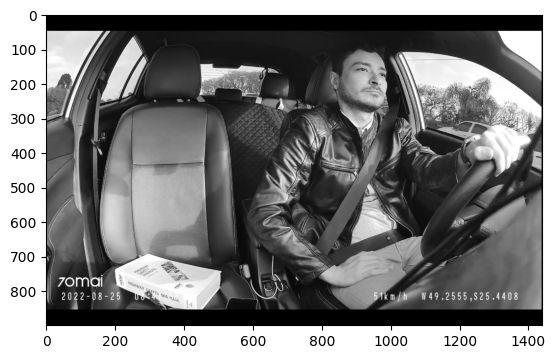

In [425]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('imagemIC.png', cv2.IMREAD_GRAYSCALE)

M = np.array([[1,1,1], [1, 1, 1], [1,1,1]]) *(1/9)
output=cv2.filter2D(img,-1,M)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

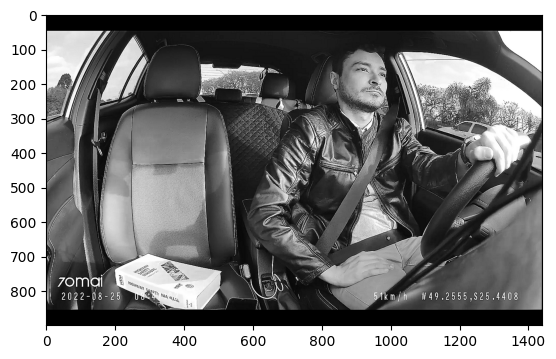

In [426]:
#Sharpening
    
M = np.array([[0,0,0], [0,2,0], [0,0,0]]) - 1/9*np.array([[1,1,1], [1,1,1], [1,1,1]])

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

output=cv2.filter2D(img,-1,kernel)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_GRAY2BGR))

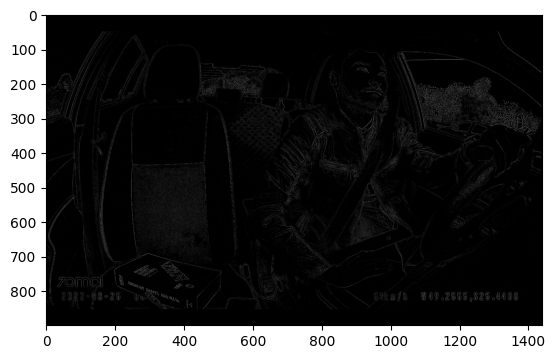

In [427]:
#Subtract do sharpness
sub=cv2.subtract(img,output)
plt.imshow(cv2.cvtColor(sub,cv2.COLOR_GRAY2BGR))

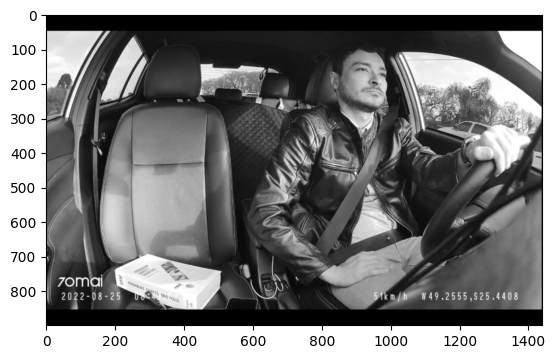

In [428]:
blur = cv2.GaussianBlur(img,(3,3),0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR))

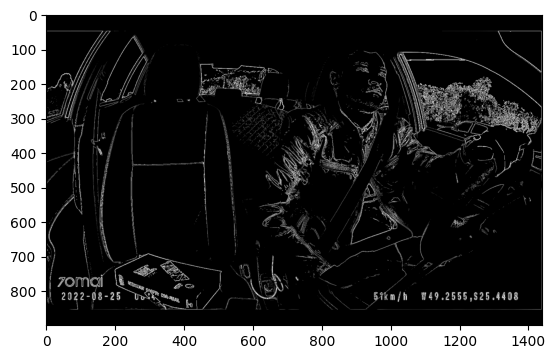

In [429]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))

# Cria uma máscara para manter apenas os pixels que representam as bordas
mask = np.uint8(sobel > np.mean(sobel) * 3)

# Aplica a máscara na imagem
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Exibe apenas as bordas
plt.imshow(masked_img, cmap='gray')

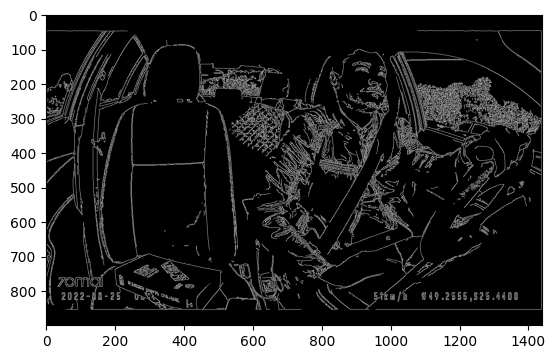

In [430]:
# Canny para detecção de bordas
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges,cmap="gray")

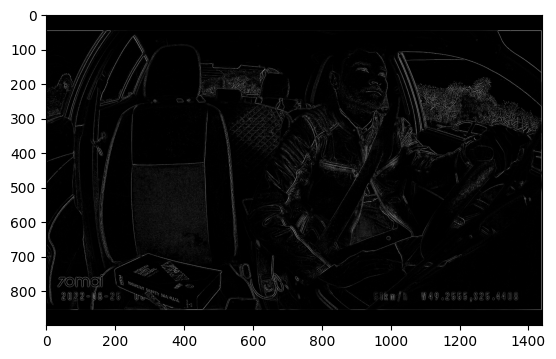

In [431]:
#Filtro laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.imshow(laplacian,cmap="gray")

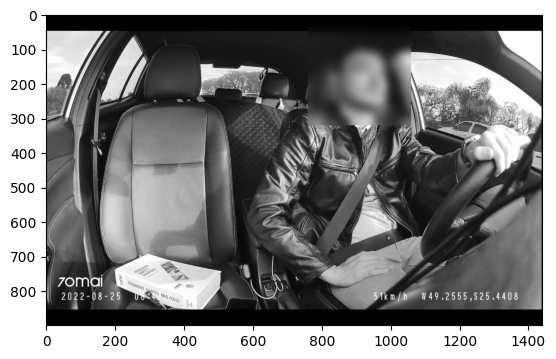

In [432]:
x = 760
y = 20
w = 300
h = 300
roi = img[y:y+h, x:x+w]
blurred_img=img[:]
ksize = (77, 77)
sigma = 0
blurred_roi = cv2.GaussianBlur(roi, ksize, sigma)

blurred_img[y:y+h, x:x+w] = blurred_roi

plt.imshow(blurred_img, cmap="gray")
